# Feature Engineering on Numeric Data

In [1]:
##--Import necessary dependencies and settings

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

In [3]:
##----Lets engineer on "Raw data from the Pokémon dataset"
poke_df = pd.read_csv('C:\Program Files\Python36\suven\ML\datasets_n_images\datasets_module_4\Pokemon.csv')
print(poke_df.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed Generation  Legendary  
0       65       65     45      Gen 1      False  
1       80       80     60      Gen 1      False  
2      100      100     80      Gen 1      False  
3      122      120     80      Gen 1      False  
4       60       50     65      Gen 1      False  


In [4]:
##-- showing values for just 3 important columns
print(poke_df[['HP', 'Attack', 'Defense']].head())

# These indicate each Pokémon’s HP (Hit Points), Attack, and Defense stats

   HP  Attack  Defense
0  45      49       49
1  60      62       63
2  80      82       83
3  80     100      123
4  39      52       43


In [5]:
#--we can also compute some basic statistical measures on these fields
print(poke_df[['HP', 'Attack', 'Defense']].describe())

               HP      Attack     Defense
count  800.000000  800.000000  800.000000
mean    69.258750   79.001250   73.842500
std     25.534669   32.457366   31.183501
min      1.000000    5.000000    5.000000
25%     50.000000   55.000000   50.000000
50%     65.000000   75.000000   70.000000
75%     80.000000  100.000000   90.000000
max    255.000000  190.000000  230.000000


In [6]:
#--working now on a different dataset
popsong_df = pd.read_csv('C:\Program Files\Python36\suven\ML\datasets_n_images\datasets_module_4\song_views.csv')
print(popsong_df.head(10))

# sample of data from the million-song dataset, which depicts 
# counts or frequencies of songs that have been heard by various users.

                                    user_id             song_id  \
0  b6b799f34a204bd928ea014c243ddad6d0be4f8f  SOBONKR12A58A7A7E0   
1  b41ead730ac14f6b6717b9cf8859d5579f3f8d4d  SOBONKR12A58A7A7E0   
2  4c84359a164b161496d05282707cecbd50adbfc4  SOBONKR12A58A7A7E0   
3  779b5908593756abb6ff7586177c966022668b06  SOBONKR12A58A7A7E0   
4  dd88ea94f605a63d9fc37a214127e3f00e85e42d  SOBONKR12A58A7A7E0   
5  68f0359a2f1cedb0d15c98d88017281db79f9bc6  SOBONKR12A58A7A7E0   
6  116a4c95d63623a967edf2f3456c90ebbf964e6f  SOBONKR12A58A7A7E0   
7  45544491ccfcdc0b0803c34f201a6287ed4e30f8  SOBONKR12A58A7A7E0   
8  e701a24d9b6c59f5ac37ab28462ca82470e27cfb  SOBONKR12A58A7A7E0   
9  edc8b7b1fd592a3b69c3d823a742e1a064abec95  SOBONKR12A58A7A7E0   

            title  listen_count  
0  You're The One             2  
1  You're The One             0  
2  You're The One             0  
3  You're The One             0  
4  You're The One             0  
5  You're The One             0  
6  You're The One       

# Binarization

In [7]:
#--We can binarize our listen_count field from our earlier dataset
watched = np.array(popsong_df['listen_count'])
watched[watched >= 1] = 1
popsong_df['watched'] = watched
print(popsong_df.head(10))

                                    user_id             song_id  \
0  b6b799f34a204bd928ea014c243ddad6d0be4f8f  SOBONKR12A58A7A7E0   
1  b41ead730ac14f6b6717b9cf8859d5579f3f8d4d  SOBONKR12A58A7A7E0   
2  4c84359a164b161496d05282707cecbd50adbfc4  SOBONKR12A58A7A7E0   
3  779b5908593756abb6ff7586177c966022668b06  SOBONKR12A58A7A7E0   
4  dd88ea94f605a63d9fc37a214127e3f00e85e42d  SOBONKR12A58A7A7E0   
5  68f0359a2f1cedb0d15c98d88017281db79f9bc6  SOBONKR12A58A7A7E0   
6  116a4c95d63623a967edf2f3456c90ebbf964e6f  SOBONKR12A58A7A7E0   
7  45544491ccfcdc0b0803c34f201a6287ed4e30f8  SOBONKR12A58A7A7E0   
8  e701a24d9b6c59f5ac37ab28462ca82470e27cfb  SOBONKR12A58A7A7E0   
9  edc8b7b1fd592a3b69c3d823a742e1a064abec95  SOBONKR12A58A7A7E0   

            title  listen_count  watched  
0  You're The One             2        1  
1  You're The One             0        0  
2  You're The One             0        0  
3  You're The One             0        0  
4  You're The One             0        0  
5  Y

# Rounding
Often when dealing with numeric attributes like proportions or percentages, we may not need values with a high amount of precision. Hence it makes sense to round off these high precision percentages into numeric integers.

In [10]:
items_popularity = pd.read_csv('C:\Program Files\Python36\suven\ML\datasets_n_images\datasets_module_4\item_popularity.csv')

# rounding off percentages
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)), dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')

print(items_popularity)

    item_id  pop_percent  popularity_scale_10  popularity_scale_100
0  it_01345      0.98324                   10                    98
1  it_03431      0.56123                    6                    56
2  it_04572      0.12098                    1                    12
3  it_98021      0.35476                    4                    35
4  it_01298      0.92101                    9                    92
5  it_90120      0.81212                    8                    81
6  it_10123      0.56502                    6                    57


# Binning

In [19]:
#--Binning
# -- dataset for binning
fcc_survey_df = pd.read_csv('C:\Program Files\Python36\suven\ML\datasets_n_images\datasets_module_4/fcc_2016_coder_survey_subset.csv')
print(fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head())

                               ID.x                        EmploymentField  \
0  cef35615d61b202f1dc794ef2746df14      office and administrative support   
1  323e5a113644d18185c743c241407754                      food and beverage   
2  b29a1027e5cd062e654a63764157461d                                finance   
3  04a11e4bcb573a1261eb0d9948d32637  arts, entertainment, sports, or media   
4  9368291c93d5d5f5c8cdb1a575e18bec                              education   

    Age   Income  
0  28.0  32000.0  
1  22.0  15000.0  
2  19.0  48000.0  
3  26.0  43000.0  
4  20.0   6000.0  


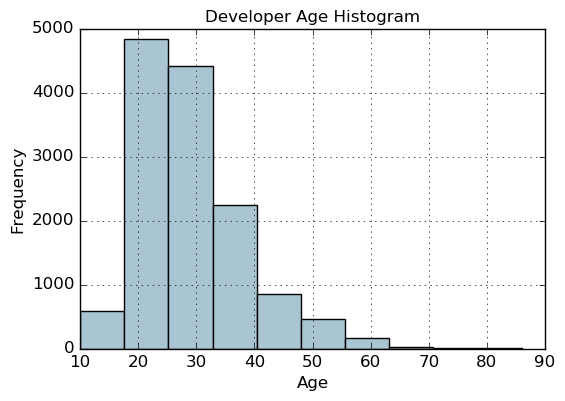

In [20]:
##---Fixed-width binning
##---Developer age distribution
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')  # default no. of bins = 10
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [21]:
# ### Binning based on rounding
# 
# ``` 
# Age Range: Bin
# ---------------
#  0 -  9  : 0
# 10 - 19  : 1
# 20 - 29  : 2
# 30 - 39  : 3
# 40 - 49  : 4
# 50 - 59  : 5
# 60 - 69  : 6
#   ... and so on
# 

# Note : when you extract any column say, fcc_survey_df['Age'] its represented as series
# using np.array is optional. Although recommended.


fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [25]:
# ### Binning based on custom ranges
# 
# ``` 
# Age Range : Bin
# ---------------
#  0 -  15  : 1
# 16 -  30  : 2
# 31 -  45  : 3
# 46 -  60  : 4
# 61 -  75  : 5
# 75 - 100  : 6
# ```
# pd.cut() is used to segment and sort data
# it does not cuts the df par-se
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
#bin_names = ['a', 'b', 'c', 'd', 'e', 'f']

fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


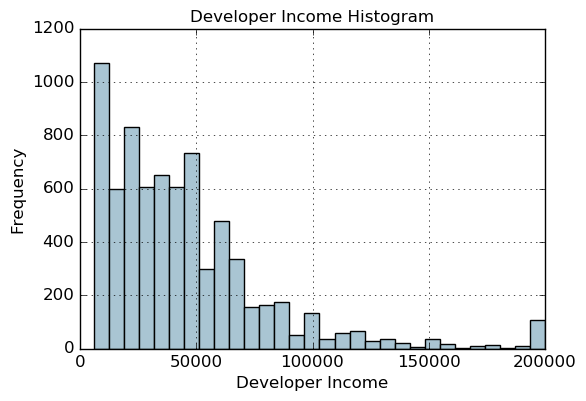

In [26]:
# Quantile based Binning

fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

# see carefully : there is a right skew with lesser
# developers earning more money and vice versa.

In [27]:
# Let’s take a 4-Quantile or a quartile based adaptive binning scheme.

quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
print(quantiles)

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64


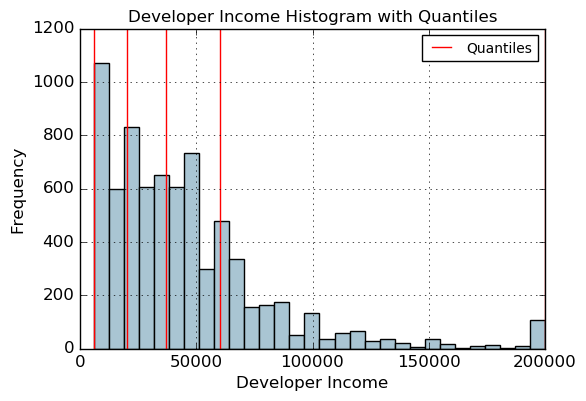

In [28]:
# plot the 4 quantile histogram 

fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')

ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

# Statistical Transformations
Let’s look at a different strategy of feature engineering on numerical data by using statistical or mathematical transformations.

In [29]:
# The log transform belongs to the power transform family of functions. 
# This function can be defined as y = log b (x) 
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

# we are doing +1 to the 'Income' to avoid taking log of 0
#remember log 0 is undefined
#y = log b (x) -> is defined for x>0

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


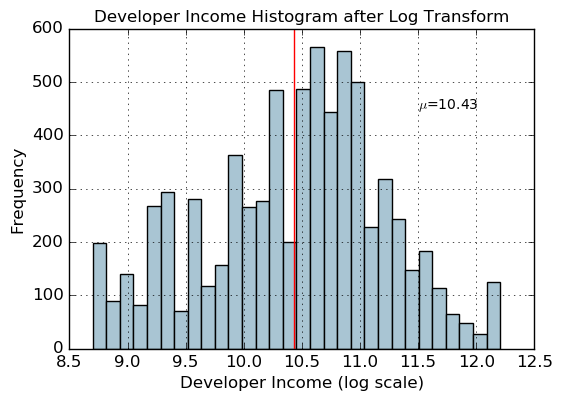

In [30]:
# Let’s now plot the data distribution of this log-transformed feature
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)
plt.show()  